**Import libraries**

In [130]:
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm
import math, operator, warnings
import matplotlib.pyplot as plt 
from prettytable import PrettyTable

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**Importing Dataset**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Assignments/IR Assignment 3/Dataset/wiki.csv')
data.head()

,source,target
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


**Building of network**


In [5]:
def dictionarymake(vertex):
  storenodes={}
  for iterator in vertex:
    if iterator not in storenodes:
        storenodes[iterator]=1
    else:
        storenodes[iterator]+=1
  return storenodes

In [6]:
def calculatethedegree(vertex,check):
    storenodes = dictionarymake(vertex)
    if not check:
        return sum(storenodes.values())/7115
    elif check == -1:
        return storenodes
    elif check == 1:
        return list((dict(sorted(storenodes.items(),key=operator.itemgetter(1),reverse=True))).keys())[0]
    else:
        return dictionarymake(list(storenodes.values()))

In [7]:
t = PrettyTable([color.BOLD+"Attribute of the Wiki-Vote Network"+color.END,color.BOLD+"VALUE"+color.END])
n = len(set(list(data['source'])+list(data['target'])))
t.add_row([color.DARKCYAN+color.BOLD+"TOTAL NUMBER OF EDGES IN THE NETWORK"+color.END,color.BLUE+color.BOLD+str(len(data))+color.END])
t.add_row(["-"*50,"-"*50])
t.add_row([color.DARKCYAN+color.BOLD+"TOTAL NUMBER OF NODES IN THE NETWORK"+color.END,color.BLUE+color.BOLD+str(n)+color.END])
t.add_row(["-"*50,"-"*50])
calValue = calculatethedegree(data['target'],1)
t.add_row([color.DARKCYAN+color.BOLD+"NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK"+color.END,color.BLUE+color.BOLD+str(calValue)+color.END])
t.add_row(["-"*50,"-"*50])
calValue = calculatethedegree(data['source'],1)
t.add_row([color.DARKCYAN+color.BOLD+"NODE WITH MAXIMUM OUT-DEGREE IN THE NETWORK"+color.END, color.BLUE+color.BOLD+str(calValue)+color.END])
t.add_row(["-"*50,"-"*50])
calValue = round(calculatethedegree(data['target'],0),2)
t.add_row([color.DARKCYAN+color.BOLD+"AVERAGE IN-DEGREE IN THE NETWORK"+color.END,color.BLUE+color.BOLD+str(calValue)+color.END])
t.add_row(["-"*50,"-"*50])
calValue = round(calculatethedegree(data['source'],0), 2)
t.add_row([color.DARKCYAN+color.BOLD+"AVERAGE OUT-DEGREE IN THE NETWORK"+color.END,color.BLUE+color.BOLD+str(calValue)+color.END])
t.add_row(["-"*50,"-"*50])
calValue = round(len(data)/(n*(n-1)),3)
t.add_row([color.DARKCYAN+color.BOLD+"DENSITY OF THE NETWORK"+color.END,color.BLUE+color.BOLD+str(calValue)+color.END])
print(t)

+----------------------------------------------------+----------------------------------------------------+
|         Attribute of the Wiki-Vote Network         |                       VALUE                        |
+----------------------------------------------------+----------------------------------------------------+
|        TOTAL NUMBER OF EDGES IN THE NETWORK        |                       103689                       |
| -------------------------------------------------- | -------------------------------------------------- |
|        TOTAL NUMBER OF NODES IN THE NETWORK        |                        7115                        |
| -------------------------------------------------- | -------------------------------------------------- |
|     NODE WITH MAXIMUM IN-DEGREE IN THE NETWORK     |                        4037                        |
| -------------------------------------------------- | -------------------------------------------------- |
|    NODE WITH MAXIMUM OUT-D

**EDGE REPRESENTATION OF NETWORK**

**Changing Data**

In [8]:
def Findedgescreatelist(data):
  listofedges=[]
  for i in range(len(data)):
    col1 = data.iloc[i,0]
    col2 = data.iloc[i,1]#change data 
    listofedges.append((col1, col2))
  return listofedges

In [145]:
listofedges = Findedgescreatelist(data)
count = 1
print("Edge Representation of Network")
for eachEdge in listofedges:
  print(color.BLUE+str(eachEdge)+color.END)
  count+=1
  if(count==1000):
    break

Edge Representation of Network
(30, 1412)
(30, 3352)
(30, 5254)
(30, 5543)
(30, 7478)
(3, 28)
(3, 30)
(3, 39)
(3, 54)
(3, 108)
(3, 152)
(3, 178)
(3, 182)
(3, 214)
(3, 271)
(3, 286)
(3, 300)
(3, 348)
(3, 349)
(3, 371)
(3, 567)
(3, 581)
(3, 584)
(3, 586)
(3, 590)
(3, 604)
(3, 611)
(3, 8283)
(25, 3)
(25, 6)
(25, 8)
(25, 19)
(25, 23)
(25, 28)
(25, 29)
(25, 30)
(25, 33)
(25, 35)
(25, 50)
(25, 54)
(25, 55)
(25, 75)
(25, 80)
(25, 86)
(25, 94)
(25, 127)
(25, 152)
(25, 154)
(25, 182)
(25, 192)
(25, 214)
(25, 224)
(25, 226)
(25, 246)
(25, 252)
(25, 255)
(25, 257)
(25, 261)
(25, 271)
(25, 273)
(25, 280)
(25, 282)
(25, 286)
(25, 299)
(25, 300)
(25, 302)
(25, 306)
(25, 308)
(25, 310)
(25, 322)
(25, 325)
(25, 339)
(25, 348)
(25, 349)
(25, 356)
(25, 358)
(25, 363)
(25, 370)
(25, 371)
(25, 373)
(25, 377)
(25, 379)
(25, 407)
(25, 415)
(25, 422)
(25, 428)
(25, 439)
(25, 488)
(25, 514)
(25, 545)
(25, 549)
(25, 560)
(25, 590)
(25, 592)
(25, 600)
(25, 604)
(25, 611)
(25, 645)
(25, 650)
(25, 659)
(25, 664)


**Adjacency matrix**

In [10]:
attributes = list(set(list(data['source'])+list(data['target'])))
creatematrix = pd.DataFrame(index=attributes,columns=attributes)
creatematrix = creatematrix.fillna(0)
for iterator in listofedges:
    creatematrix[iterator[0]][iterator[1]]=1
print(color.BOLD+"ADJACENCY MATRIX"+color.END)
display(creatematrix)

ADJACENCY MATRIX


,3,4,5,6,7,8,9,10,11,12,...,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**In Degree Distribution of the Network**

In [11]:
def showGraph(data,x_vals,y_vals,xlabel,title):
  plt.figure(figsize=[25,10])
  plt.scatter(list(data.keys()),list(data.values()))
  plt.title(title,fontsize=12)
  plt.xlabel(xlabel,fontsize=12)
  plt.xticks(x_vals,fontsize=12)
  plt.yticks(y_vals,fontsize=12)
  plt.ylabel("Number of Nodes of the network",fontsize=10)
  plt.grid()
  plt.show()

In [12]:
def create1(totalcount, mvl):
  vls = []
  for iterator in range(1, totalcount):
      if(iterator % mvl == 0 or iterator == 1):
          vls.append(iterator)
  return vls

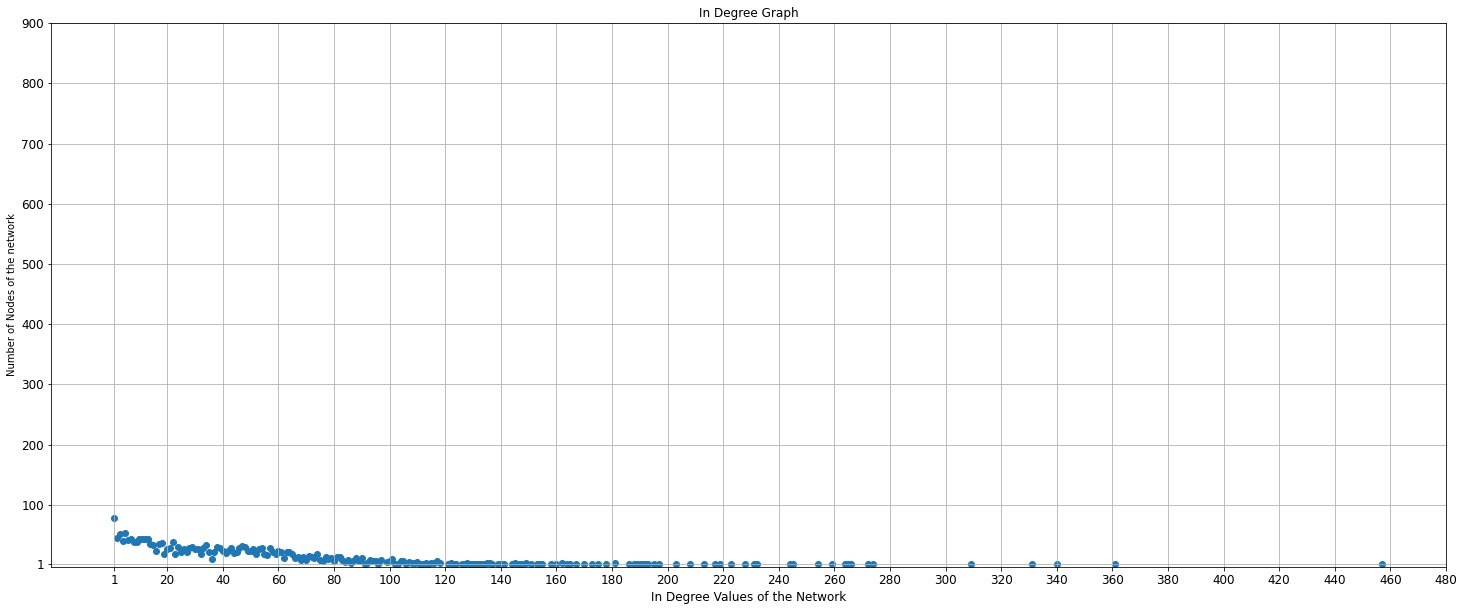

In [13]:
countind = calculatethedegree(data['target'],2)
showGraph(countind,create1(500, 20),create1(1000, 100), "In Degree Values of the Network","In Degree Graph")

**Out Degree Distribution of the Network**

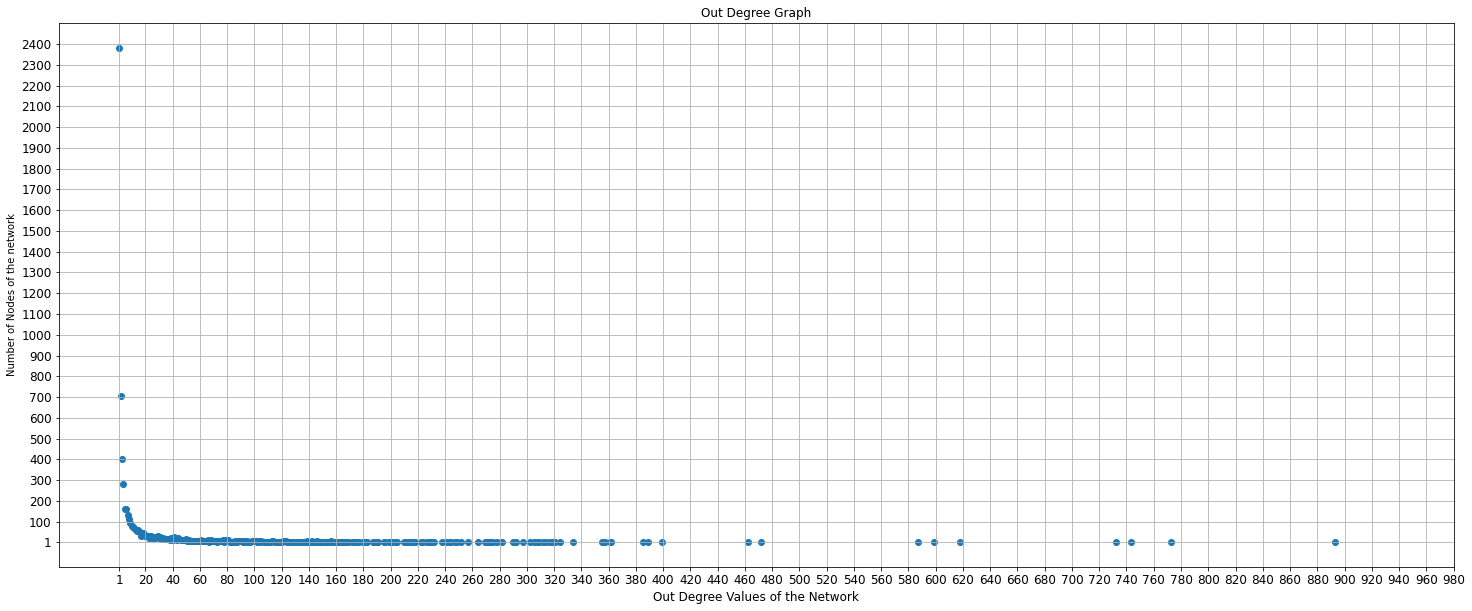

In [14]:
countout = calculatethedegree(data['source'],2)
showGraph(countout, create1(1000, 20), create1(2500, 100), "Out Degree Values of the Network", "Out Degree Graph")

**Clustering Coefficient Of Each Node of the Network**

In [15]:
def find1(vertex,creatematrix):
  find2,n1=0,[]
  for j in vertex:
      if creatematrix[iterator][j]:
          n1.append(j)
  for k in n1:
      for k2 in n1:
          if creatematrix[k][k2]:
              find2 += 1
  return n1,find2

In [16]:
print(color.BOLD+"Clustering Coefficient Of Each Node of the Network\n"+color.END)
vertex = list(set(list(data['source'])+list(data['target'])))
clust_coeff = {}
for iterator in tqdm(vertex, leave=True, position=0):
  n1, find2 = find1(vertex, creatematrix)
  try:
      clust_coeff[iterator] = (find2)/(len(n1)*(len(n1)-1))
  except:
      clust_coeff[iterator] = 0
t1 = PrettyTable([color.BOLD+'Node Number'+color.END,color.BOLD+'Clustering Coeffient Value of the Node'+color.END])
for i in dict(sorted(clust_coeff.items(),key=operator.itemgetter(1),reverse=True)):
    t1.add_row([i,clust_coeff[i]])
print(t1)

Clustering Coefficient Of Each Node of the Network



100%|██████████| 7115/7115 [10:03<00:00, 11.79it/s]


+-------------+----------------------------------------+
| Node Number | Clustering Coeffient Value of the Node |
+-------------+----------------------------------------+
|     444     |                  1.0                   |
|     498     |                  1.0                   |
|     666     |                  1.0                   |
|     910     |                  1.0                   |
|     1199    |                  1.0                   |
|     1214    |                  1.0                   |
|     1444    |                  1.0                   |
|     1782    |                  1.0                   |
|     1923    |                  1.0                   |
|     1979    |                  1.0                   |
|     2293    |                  1.0                   |
|     3689    |                  1.0                   |
|     3809    |                  1.0                   |
|     3851    |                  1.0                   |
|     3999    |                

In [17]:
def calCounts(clust_coeff):
  count0, count1 = 0, 0 
  for i in clust_coeff:
    if not clust_coeff[i]:
        count0 += 1
    if clust_coeff[i] == 1:
        count1 += 1
  return count0, count1

In [18]:
uniqueCCV = []
for x , y in clust_coeff.items():
  if y not in uniqueCCV:
    uniqueCCV.append(y)

In [19]:
df = pd.DataFrame(columns = ['NodeNumber','CCValue'])

In [20]:
df['NodeNumber'] = clust_coeff.keys()
df['CCValue'] = clust_coeff.values()

In [21]:
x = list(df['NodeNumber'])
y = list(df['CCValue'])

In [22]:
 l3 = df['CCValue'].value_counts()

In [23]:
 df1 = pd.DataFrame(l3)

In [24]:
valuess = list(df1.index)
ccValues = list(df1.CCValue)

Text(0.5, 0, 'Clustering Coefficient Value of the nodes')

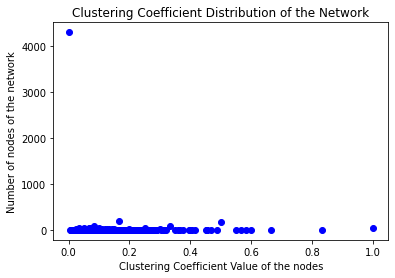

In [25]:
plt.scatter(valuess,ccValues,color='Blue')
plt.title('Clustering Coefficient Distribution of the Network')
plt.ylabel('Number of nodes of the network')
plt.xlabel('Clustering Coefficient Value of the nodes')

In [26]:
count0, count1 = calCounts(clust_coeff)
print(color.BOLD+"Number of Nodes having Clustering Coefficient Value 0 ="+color.END,color.BLUE+str(count0)+color.END)
print(color.BOLD+"Number of Nodes having Clustering Coefficient Value 1 ="+color.END,color.BLUE+str(count1)+color.END)
print(color.BOLD+"Final Clustering Coefficient of the Network = "+color.END,color.BLUE+str(sum(list(clust_coeff.values()))/len(vertex))+color.END)

Number of Nodes having Clustering Coefficient Value 0 = 4297
Number of Nodes having Clustering Coefficient Value 1 = 45
Final Clustering Coefficient of the Network =  0.060885242517651504


**Evaluating Ranks of Nodes by Using Page Rank Algorithm**

In [121]:
#Initilizing pre-requisite parameter values for pagerank algorithm
valueAlpha=0.85
iterationsNumber=100
valueTotal=1.0e-6
valueWeights='weight'

In [123]:
#Creating function to implement the working of pagerank algorithm
def pagerank(targetGraph):
	weightNumber = nx.stochastic_graph(targetGraph, weight=valueWeights)
	nodeNumbers = weightNumber.number_of_nodes()
	targetDict = dict.fromkeys(weightNumber,1.0 / nodeNumbers)
	targetP = dict.fromkeys(weightNumber,1.0 / nodeNumbers)
	WD = targetP
	nodesD = [n for n in weightNumber if weightNumber.out_degree(n, weight=valueWeights) == 0.0]
	for _ in range(iterationsNumber):
		lastElementX = targetDict
		targetDict = dict.fromkeys(lastElementX.keys(), 0)
		danglesum = valueAlpha * sum(lastElementX[n] for n in nodesD)
		for ite1 in targetDict:
			for nbr in weightNumber[ite1]:
				targetDict[nbr] += valueAlpha * lastElementX[ite1] * weightNumber[ite1][nbr][valueWeights]
			targetDict[ite1] += danglesum * WD[ite1] + (1.0 - valueAlpha) * targetP[ite1]  
		resultant = sum([abs(targetDict[ite1] - lastElementX[ite1]) for ite1 in targetDict])
		if resultant < nodeNumbers*valueTotal:
			return targetDict

In [129]:
#Calling above function and displaying pagerank scores
nodesRanksDictByPagerank = pagerank(myGraph)
count = 1
print(color.BOLD+"Node Number"," : ","Pagerank Score"+color.END)
for x, y in nodesRanksDictByPagerank.items():
  print(color.BLUE+str(x)," :    ",str(y)+color.END)
  count+=1
  if(count==1000):
    break

Node Number  :  Pagerank Score
30  :     0.00017349553934328362
1412  :     0.0008141761230496596
3352  :     0.0017851250122027215
5254  :     0.0021500675059293235
5543  :     0.0010508052619841281
7478  :     0.0008124303526134783
3  :     0.00020539498232448027
28  :     0.0016986730322136937
39  :     0.0003439790689580258
54  :     0.0003476546497189804
108  :     0.00043983711534545167
152  :     0.0005817197428805893
178  :     0.0002975848833195019
182  :     0.00016083873728146711
214  :     0.001659919966936546
271  :     0.001334924091441659
286  :     0.00017367757770305088
300  :     0.00015065607046072738
348  :     0.00017393564565284633
349  :     9.460415271381965e-05
371  :     0.00028929033923574956
567  :     0.0003315269129516528
581  :     0.00010905154270480285
584  :     0.00022615441013923315
586  :     0.0001051882501948107
590  :     0.0001945807586420494
604  :     0.00018151640169193395
611  :     0.00021640905598463537
8283  :     0.00032879238326170694
2

**Evaluating Authority and Hub score of Each Node by using HITS Algorithm**

In [135]:
#Creating function to evaluate above required scores using HITS algorithm
def hubsAuthorityScoreEvaluation(targetGraph, loopNumbers, valueTolOriginal=1.0e-8):
    hScoreDict = dict.fromkeys(targetGraph,1.0 / targetGraph.number_of_nodes())
    authScoreDict = dict()
    for _ in range(loopNumbers):
        lh = hScoreDict
        hScoreDict =dict.fromkeys(lh.keys(),0)
        authScoreDict =dict.fromkeys(lh.keys(),0)
        for eachNode in hScoreDict:
            for neighbor in targetGraph[eachNode]:
                authScoreDict[neighbor]=authScoreDict[neighbor]+(lh[eachNode]*targetGraph[eachNode][neighbor].get('weight',1))     
        for eachNode in hScoreDict:
            for neighbor in targetGraph[eachNode]:
                hScoreDict[eachNode]=hScoreDict[eachNode]+(authScoreDict[neighbor]*targetGraph[eachNode][neighbor].get('weight',1))
        sValue=1.0/max(hScoreDict.values())
        for eachNode in hScoreDict:
            hScoreDict[eachNode]=hScoreDict[eachNode]*sValue
        sValue=1.0/max(authScoreDict.values())
        for eachNode in authScoreDict:
            authScoreDict[eachNode]=authScoreDict[eachNode]*sValue
        resultantValue=sum([abs(hScoreDict[eachNode]-lh[eachNode]) for eachNode in hScoreDict])
        if resultantValue<valueTolOriginal:
            break
    return hScoreDict, authScoreDict

In [144]:
#Calling above function to evaluate HUB and Authority Scores
hubScoreDictFinal,AuthorityScoreDictFinal=hubsAuthorityScoreEvaluation(myGraph, 5)

In [140]:
#Displaying HUB scores
count = 1
print(color.BOLD+"Node Number"," : ","HUB Score"+color.END)
for x, y in hubScoreDictFinal.items():
  print(color.DARKCYAN+str(x)," :    ",str(y)+color.END)
  count+=1
  if(count==1000):
    break

Node Number  :  HUB Score
30  :     0.00998179932694693
1412  :     0.0
3352  :     0.42573918623360957
5254  :     0.04750055792326323
5543  :     0.17590560962380986
7478  :     0.0
3  :     0.00508778113384111
28  :     0.045127947887486315
39  :     0.013485426941127372
54  :     0.003195859318214718
108  :     0.00032640956457402566
152  :     0.007575360797951532
178  :     0.05503223958138495
182  :     0.0840078883781553
214  :     0.0
271  :     0.0
286  :     0.0
300  :     0.0
348  :     0.011764051748266065
349  :     0.0001320128812490878
371  :     0.11913783267604111
567  :     0.00021405353127680848
581  :     0.0
584  :     0.0010122328790599718
586  :     0.007909025479646472
590  :     0.005022312349469831
604  :     0.0030297444530010776
611  :     0.0
8283  :     0.0
25  :     0.026958173031510563
6  :     0.13313457238975612
8  :     0.04048727601921059
19  :     0.009134709492141822
23  :     0.022935315769161524
29  :     0.08520031305859457
33  :     0.00883628

In [143]:
#Displaying Authority scores
count = 1
print(color.BOLD+"Node Number"," : ","Authority Score"+color.END)
for x, y in AuthorityScoreDictFinal.items():
  print(color.DARKCYAN+str(x)," :         ",str(y)+color.END)
  count+=1
  if(count==1000):
    break

Node Number  :  Authority Score
30  :          0.03707041191889022
1412  :          0.04735802530176851
3352  :          0.9024990712420002
5254  :          0.7075491553162044
5543  :          0.4981085394963819
7478  :          0.295706551449484
3  :          0.03706006574782208
28  :          0.09927335397023307
39  :          0.023934452266701815
54  :          0.054655751098838704
108  :          0.0018980375662156956
152  :          0.05012445949541621
178  :          0.04989769827097228
182  :          0.036447380826494985
214  :          0.32074893053991044
271  :          0.28971530730042583
286  :          0.03206430494907508
300  :          0.014705482601227997
348  :          0.044069106210803795
349  :          0.011725150461232485
371  :          0.03108246252752324
567  :          0.028364363423922075
581  :          0.009076188134310418
584  :          0.021482467620111228
586  :          0.010889403277603174
590  :          0.03428214592687686
604  :          0.01060616